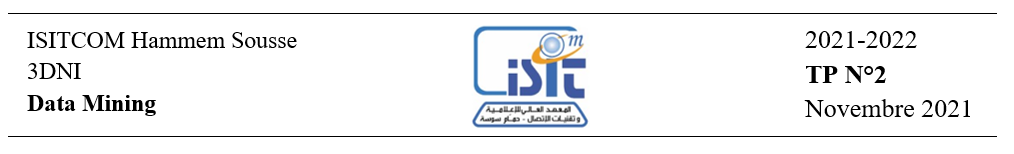

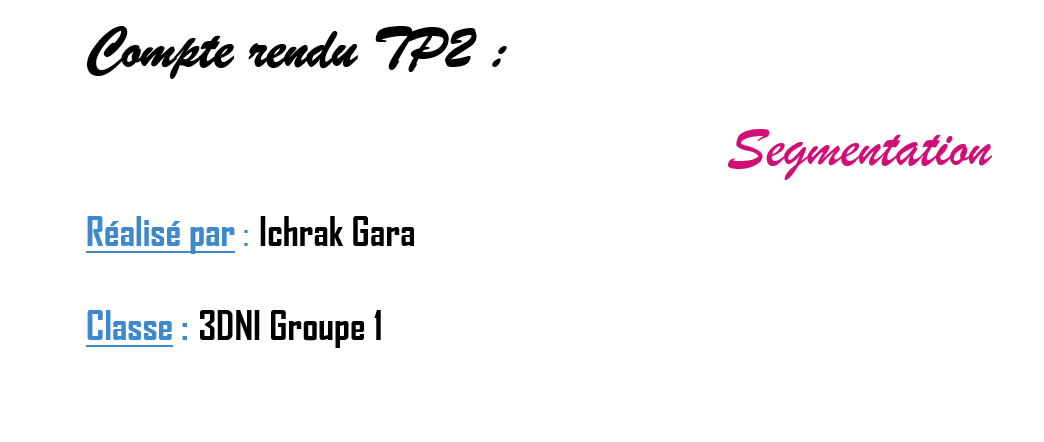

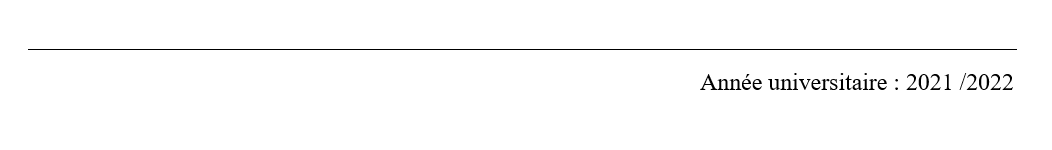

# <span style="color:	#439EA9 ">I. Objectif</span>

### L'objectif de ce TP est d'essayer de faire une segmentation (clustering) sur une image a fin de représenter l'image en des choses plus significatif et plus facile d'analyser.

# <span style="color:	#439EA9 ">II. Partie Théorique </span>

### La segmentation d’image: est le processus de partitionnement d’une image en plusieurs segments. 
### Il est généralement utilisé pour localiser des objets et créer des limites. 

## <span style="color:	purple "> Exemple 1 </span>

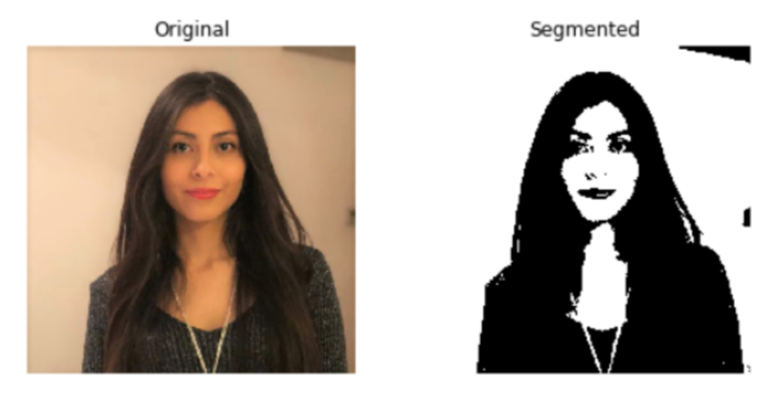

### Cette méthode de classification non supervisée rassemble un ensemble d’algorithmes d’apprentissage dont le but est de regrouper entre elles des données non étiquetées présentant des propriétés similaires. Isoler ainsi des schémas ou des familles permet aussi de préparer le terrain pour l’application ultérieure d’algorithmes d’apprentissage supervisé. L'algorithme des Kmeans peut être utilisé pour effectuer une segmentation d'une image qui présente des zones de couleur relativement uniforme.
### On obtient ainsi un nuage de points sur lequel on applique l'algorithme des k-means

## <span style="color:	purple "> Exemple 2 avec K-means(k=3) </span>

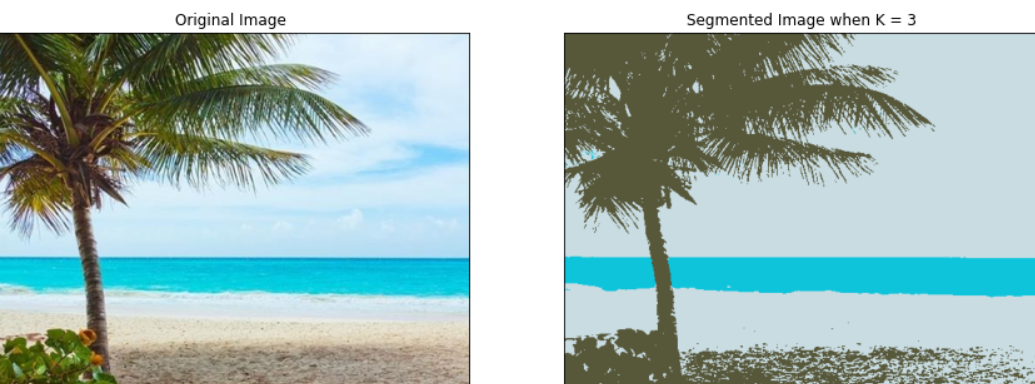

# <span style="color:	#439EA9 ">III. Partie Pratique </span>

# <span style="color:	#06536E ">Partie 1</span>

### Dans cette partie, on s'interesse au a l'effet de clustering sur l'image en modifiant a chaque fois le nombre de cluster dans l'algorithme de k-means.

## <span style="color:	purple ">1.  Importation: </span>

On commence par l'installation de la bilbliothéque "OPEN-CV"

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import skimage.io
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Ensuite, on importe les bibliothéques nécessaires:
- **`Numpy :`**pour tout les opération mathématiques
- **`sklearn :`**pour l'accés au algorithme de machine learning comme K-mens
- **`matplotlib :`**pour l'affichge de tout ce qui est courbes et graphes
- **`skimage :`**pour le traitement des images
- **`ipywidgets :`**pour visualiser les changements dans les données.

## <span style="color:	purple ">2.  Segmentation avec k-means </span>

In [3]:
def segmentation(K):
    image= cv2.imread('tom-gerry.jpg')

    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))


    clt = KMeans(n_clusters = K)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    cv2.imwrite('tom-gerry1.jpg', quant)
    return plt.imshow(quant)



In [4]:
interact(segmentation, K=widgets.IntSlider(min=2, max=20, step=1, value=2));

interactive(children=(IntSlider(value=2, description='K', max=20, min=2), Output()), _dom_classes=('widget-int…

<div class="alert alert-success">
On trouve les deux couleurs dominantes dans l'image, et à chaque fois qu'on augmente le nombre de cluster(K), l'image segmentée se rapproche de l'image originale.
</div>

## <span style="color:	purple ">3.  Application de certain bruit </span>

# <span style="color:	#06536E ">Partie 2 </span>

### Dans cette partie, on va concentrer sur l'image bruitée, et on va ajouter quelques types de bruit à notre image:
- **`Gaussian`**
- **`Localvar`**
- **`Poisson`**
- **`Salt`**
- **`pepper`**
- **`s&p`**
- **`speckle`**


In [5]:
def plotnoise(mode):
    img_path="tom-gerry.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt", "pepper", "s&p", "speckle",None]);
plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'pepper…

## <span style="color:	purple ">4.  Élimination du bruit </span>

# <span style="color:	#06536E ">Partie 3 </span>

### Dans la derniére partie on va essayer d'éliminer la bruit puis on fait la segmentation de chaque image 

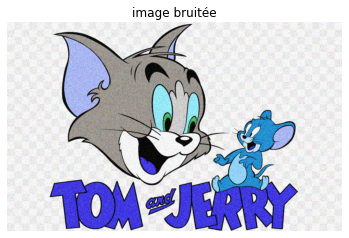

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


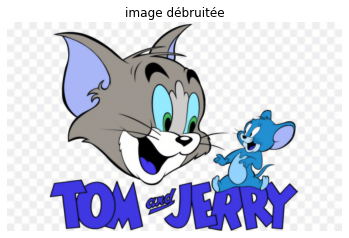

In [6]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_orig=cv2.imread('tom-gerry.jpg')
noisy_image = random_noise(image_orig)
show_image(noisy_image, 'image bruitée')

denoised_image = denoise_tv_chambolle(image_orig, weight=0.1, multichannel=True)
show_image(denoised_image, 'image débruitée')


Dans la bibliothéque skimage on utilise la fonction suivant pour éliminer la bruit : 
- **`denoise_tv_chambolle :`**pour éliminer la variation totale de bruit

# <span style="color:	#439EA9 ">VI. Conclusion </span>

### Au cours de ce TP, nous avons appliquer le **`clustering`** pour determiner les couleurs dominants dans une image, en utilisons la bibliothéque **`KMeans`** et nous remarquons que lorsque le nombre de cluster = 2 , on trouve les deux couleurs dominants dans l'image, et à chaque fois qu'on augmente le nombre de cluster, l'image segmentée sera plus proche de l'image originale.

### Ensuite, on a appliquer plusieurs type de bruits sur l'image, et on remarque que a performance de clustering diminue lorsque l'image est bruité.


